In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification

In [6]:
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                         n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                         weights=[0.9, 0.1], class_sep=0.8, random_state=0)

In [7]:
df=pd.DataFrame(X, columns=['x1','x2'])
df['target']=y
df.head()

,x1,x2,target
0,-0.200228,-1.126880,0
1,-0.873630,0.999259,0
2,-0.722953,0.106167,0
3,-0.548422,1.903053,0
4,-1.254758,2.445131,0


In [9]:
df['target'].value_counts()

0    894
1    106
Name: target, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   target  1000 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 19.7 KB


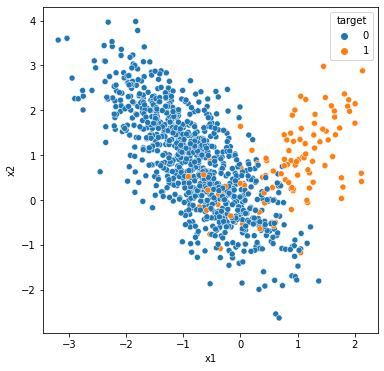

In [11]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='x1', y='x2', hue='target')
plt.show()

In [12]:
from mpl_toolkits.mplot3d import Axes3D

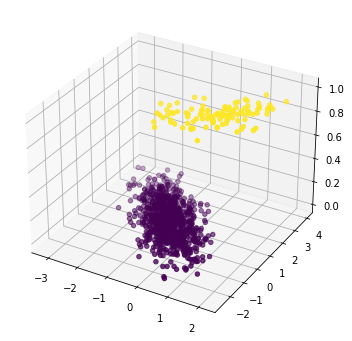

In [13]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['target'], c=df['target'])
plt.show()

## dùng SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
sm = SMOTE(random_state=0)

In [16]:
X_resample, y_resample = sm.fit_resample(X, y)

In [17]:
df_new1 = pd.DataFrame(X_resample, columns=['x1','x2'])
df_new1['target'] = y_resample
df_new1.head()

,x1,x2,target
0,-0.200228,-1.126880,0
1,-0.873630,0.999259,0
2,-0.722953,0.106167,0
3,-0.548422,1.903053,0
4,-1.254758,2.445131,0


In [18]:
df_new1['target'].value_counts()

1    894
0    894
Name: target, dtype: int64

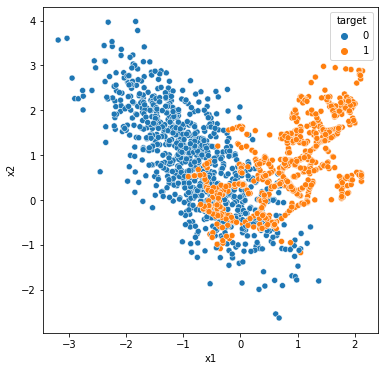

In [20]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_new1, x='x1', y='x2', hue='target')
plt.show()

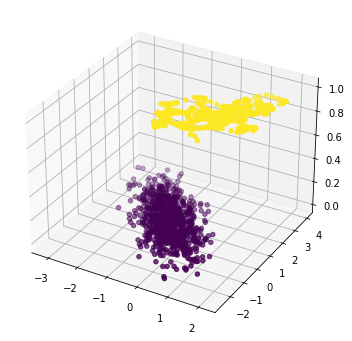

In [22]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_new1['x1'], df_new1['x2'], df_new1['target'], c=df_new1['target'])
plt.show()

## dùng RandomOverSampler

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
ros = RandomOverSampler(random_state=0)

In [25]:
X_resample2, y_resample2 = ros.fit_resample(X, y)

In [26]:
df_new2 = pd.DataFrame(X_resample2, columns=['x1','x2'])
df_new2['target'] = y_resample2
df_new2.head()

,x1,x2,target
0,-0.200228,-1.126880,0
1,-0.873630,0.999259,0
2,-0.722953,0.106167,0
3,-0.548422,1.903053,0
4,-1.254758,2.445131,0


In [27]:
df_new2['target'].value_counts()

1    894
0    894
Name: target, dtype: int64

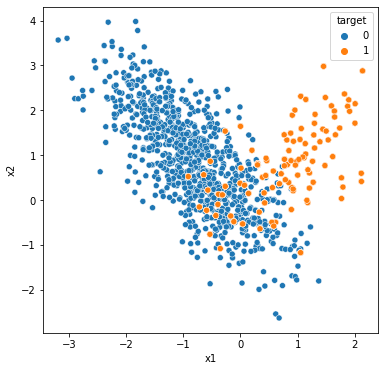

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_new2, x='x1', y='x2', hue='target')
plt.show()

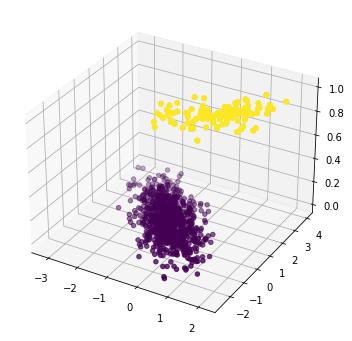

In [29]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_new2['x1'], df_new2['x2'], df_new2['target'], c=df_new2['target'])
plt.show()

## dùng resample

In [30]:
from sklearn.utils import resample

In [31]:
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]

In [32]:
df_0.shape, df_1.shape

((894, 3), (106, 3))

In [33]:
df_1_resample = resample(df_1, replace=True, n_samples=df_0.shape[0], random_state=0)

In [34]:
df_1_resample.shape

(894, 3)

In [35]:
df_new3 = pd.concat([df_0, df_1_resample])

In [36]:
df_new3['target'].value_counts()

1    894
0    894
Name: target, dtype: int64

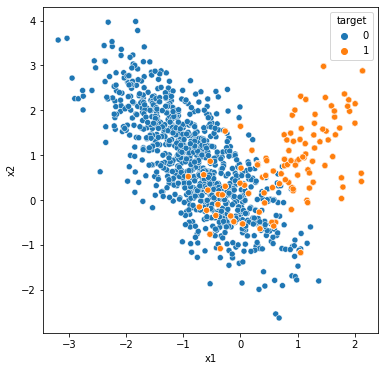

In [37]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_new3, x='x1', y='x2', hue='target')
plt.show()

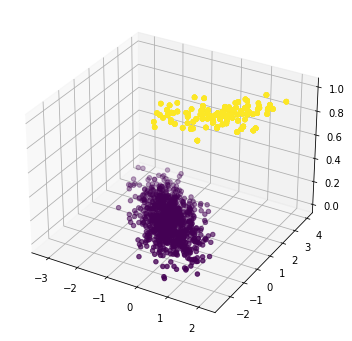

In [38]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_new3['x1'], df_new3['x2'], df_new3['target'], c=df_new3['target'])
plt.show()